In [1]:
import glob

read_files = glob.glob("*.rating")

with open("yelp.rating", "w") as outfile:
    for f in read_files:
        with open(f, "r") as infile:
            outfile.write(infile.read())

In [2]:
from collections import defaultdict
import numpy as np
import scipy, scipy.sparse, scipy.sparse.linalg
import matplotlib.pyplot as plt

In [3]:
graph = defaultdict(list)
users_set = set()
with open('yelp.links') as file:
    for line in file:
        node_1, node_2, _ = map(int, line.strip().split('\t'))
        graph[node_1].append(node_2)
        graph[node_2].append(node_1)
        users_set.update([node_1, node_2])
num_users = len(users_set)

In [15]:
print("For yelp dataset, there are:", num_users, "users.")

For yelp dataset, there are: 17237 users.


In [4]:
items_set = set()
with open('yelp.rating') as file:
    for line in file:
        user, item, _ = map(int, line.strip().split('\t'))
        items_set.add(item)
num_items = len(items_set)
item_idx_encode = dict(zip(sorted(list(items_set)), 
                           range(num_users, num_users+num_items)))
with open('yelp.rating') as file:
    for line in file:
        user, item, _ = map(int, line.strip().split('\t'))
        item = item_idx_encode[item]
        graph[user].append(item)
        graph[item].append(user)

In [37]:
print("For yelp dataset, there are:", num_items, "items.")

For yelp dataset, there are: 37378 items.


In [5]:
A = np.zeros((num_users+num_items, num_users+num_items))
for node in graph:
    for neighbor in graph[node]:
        A[node][neighbor] = 1
        A[neighbor][node] = 1

In [6]:
A_sparse = scipy.sparse.csc_matrix(A)

In [7]:
eig_val, eig_vec = scipy.sparse.linalg.eigs(A_sparse, k=1)

In [58]:
eig_vec = np.abs(eig_vec)

In [59]:
import pickle

pickle.dump(eig_vec.real, open('eigen_vector.p', 'wb'))
pickle.dump(item_idx_encode, open('item_idx_encode.p', 'wb'))

In [33]:
# Normalization for eigen-score

edge_score_min=(np.abs(eig_vec).min())**2
edge_score_max=(np.abs(eig_vec).max())**2

In [48]:
# the original item_vector has 38342 items, but we only used 37378 of them
item_vector = np.load("old_item_vector.npy")
new_item_vector = []
for i in range(len(item_vector)):
    if i in items_set:
        new_item_vector.append(item_vector[i])
new_item_vector = np.array(new_item_vector)
with open('item_vector.npy', 'wb') as f:
    np.save(f, new_item_vector)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1966: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([1.0000e+00, 3.0000e+00, 3.0000e+00, 1.3000e+01, 2.0000e+01,
        4.3000e+01, 9.0000e+01, 2.5400e+02, 7.4200e+02, 5.3446e+04]),
 array([-1.14011094e-01+0.j, -1.02609986e-01+0.j, -9.12088769e-02+0.j,
        -7.98077682e-02+0.j, -6.84066595e-02+0.j, -5.70055508e-02+0.j,
        -4.56044421e-02+0.j, -3.42033335e-02+0.j, -2.28022248e-02+0.j,
        -1.14011161e-02+0.j, -7.40622770e-09+0.j]),
 <BarContainer object of 10 artists>)

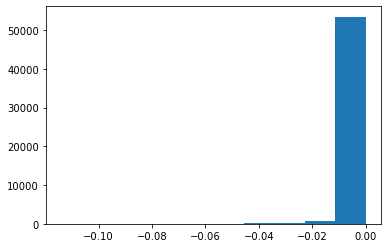

In [57]:
import matplotlib.pyplot as plt

plt.hist(eig_vec)

In [60]:
eig_vec[10]*eig_vec[[1,2,3]]

array([[2.72809452e-07],
       [1.17464727e-06],
       [1.50737570e-05]])